In [11]:
import numpy as np

from models import *
from gen_model import GPT

import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline 

In [14]:
joint_dims = 66
seq_len = 50
target_offset = 25
step_size = 1
hidden_size = 64
batch_size = 16

is_cuda = torch.cuda.is_available()
# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

GT_model = GPT(n_layer=6, n_head=6, n_embd=192, vocab_size=joint_dims*2, block_size=seq_len*2-1, pdrop=0.1, device=device)
GT_model.load_state_dict(torch.load('trained_model_data/GT_iso1_small_statedict.pt'))
GT_model.eval()

number of parameters: 2.71M


GPT(
  (transformer): ModuleDict(
    (wte): Linear(in_features=132, out_features=192, bias=True)
    (wpe): Embedding(99, 192)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-5): 6 x Block(
        (ln_1): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
        (attn): CausalSelfAttention(
          (c_attn): Linear(in_features=192, out_features=576, bias=True)
          (c_proj): Linear(in_features=192, out_features=192, bias=True)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
        (mlp): ModuleDict(
          (c_fc): Linear(in_features=192, out_features=768, bias=True)
          (c_proj): Linear(in_features=768, out_features=192, bias=True)
          (act): NewGELU()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((192,), eps=1e-05, elementwise_affine=True)


In [16]:
GT_model.transformer.wpe

Embedding(99, 192)

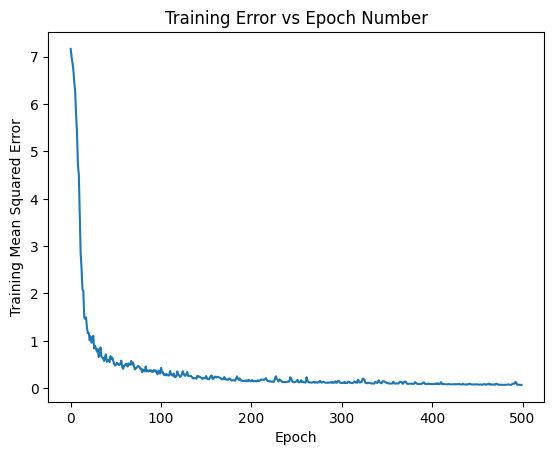

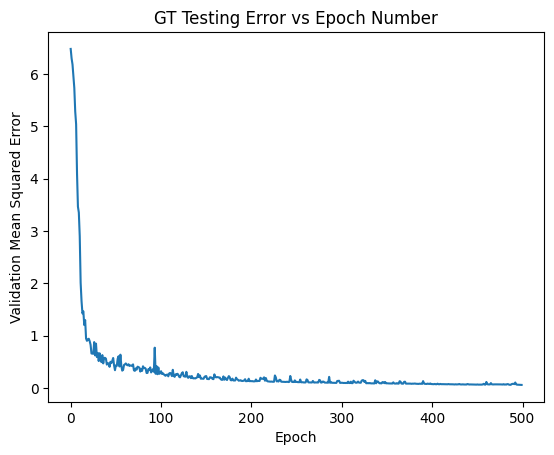

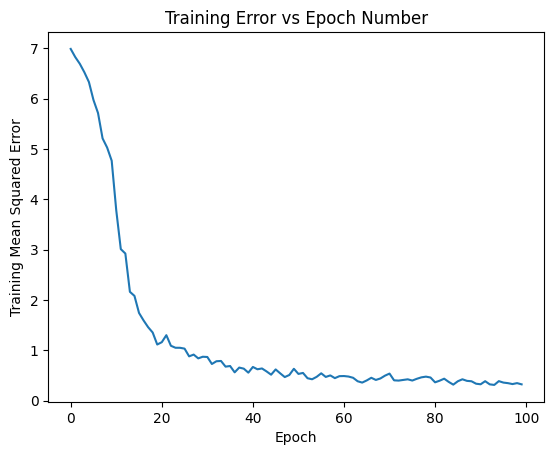

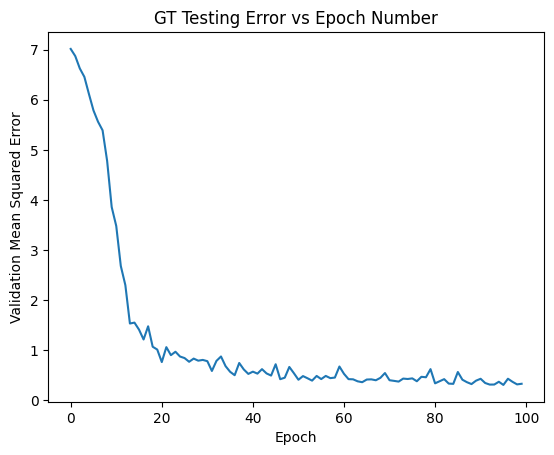

In [7]:
epoch_losses_gt1 = np.loadtxt('trained_model_data/epoch_losses_GT_2.gz')
evaluations_gt1 = np.loadtxt('trained_model_data/evaluations_GT_2.gz')

plt.plot(epoch_losses_gt1)
plt.title("Training Error vs Epoch Number")
plt.xlabel("Epoch")
plt.ylabel("Training Mean Squared Error")
plt.show()

plt.plot(evaluations_gt1)
plt.title("GT Testing Error vs Epoch Number")
plt.xlabel("Epoch")
plt.ylabel("Validation Mean Squared Error")
plt.show()


epoch_losses_gt_iso = np.loadtxt('trained_model_data/epoch_losses_GT_iso1.gz')
evaluations_gt_iso = np.loadtxt('trained_model_data/evaluations_GT_iso1.gz')

plt.plot(epoch_losses_gt_iso)
plt.title("Training Error vs Epoch Number")
plt.xlabel("Epoch")
plt.ylabel("Training Mean Squared Error")
plt.show()

plt.plot(evaluations_gt_iso)
plt.title("GT Testing Error vs Epoch Number")
plt.xlabel("Epoch")
plt.ylabel("Validation Mean Squared Error")
plt.show()


In [4]:
from train_utils import evaluate_masks, evaluate_stupid, evaluate_standard
from torch.utils.data import DataLoader
from individual_TF import IndividualTF
import time

data_subsets = torch.utils.data.random_split(dataset, [100, 200, 400, 800, 1600, 3200, len(dataset)-6300])
data_loaders = [DataLoader(data_subset, batch_size=64, num_workers=0, shuffle=True) for data_subset in data_subsets]

criterion = F.mse_loss

# model1 = torch.load('trained_model_data/TransformerModel5.pt', map_location="cpu")
model2 = torch.load('trained_model_data/EncoderDecoderModel.pt', map_location=torch.device('cpu'))
model3 = torch.load('trained_model_data/GRU.pt', map_location=torch.device('cpu'))

# joint_dims = 66
# model = IndividualTF(enc_inp_size=joint_dims*2, dec_inp_size=(joint_dims*2)+(joint_dims//3), dec_out_size=joint_dims*2, device=device)
# model.load_state_dict(model1.state_dict())

# for parameter in model1.parameters():
#     parameter = parameter.to(torch.device('cpu'))
#     # print(parameter.to(torch.device('cpu')))
    
# print(model.cuda())


eval1 = []
eval2 = []
eval3 = []

time1 = []
time2 = []
time3 = []
for data_loader in data_loaders[:-1]:
    # start = time.process_time()
    # e1 = evaluate_masks(model1, data_loader, criterion, torch.device('cpu'))
    # end = time.process_time()
    # time1.append(end-start)
    # eval1.append(e1)

    start = time.process_time()
    e2 = evaluate_stupid(model2, data_loader, criterion, torch.device('cpu'))
    end = time.process_time()
    time2.append(end-start)
    eval2.append(e2)

    start = time.process_time()
    e3 = evaluate_standard(model3, data_loader, criterion, torch.device('cpu'))
    end = time.process_time()
    time3.append(end-start)
    eval3.append(e3)

print(time1)
print(time2)
print(time3)

print(eval1)
print(eval2)
print(eval3)



[]
[2.111623999999999, 3.360427999999999, 6.7980540000000005, 13.405099, 26.381020999999997, 54.516205]
[0.4143769999999982, 0.8563589999999976, 1.377481000000003, 2.5751029999999986, 7.5736869999999925, 16.747066999999987]
